<a href="https://colab.research.google.com/github/OtterSolution/InfoErettsegiPython/blob/main/2020_m%C3%A1jus_inf/e_inf_20maj.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# 4. Meteorológiai jelentés

Az ország területén néhány városból rendszeres időközönként időjárás táviratokat küldenek.
A távirat egy rövid szöveges üzenet, amely a főbb időjárási információkat tartalmazza.
Rendelkezésünkre áll az ország területéről egy adott nap összes távirata.

A *tavirathu13.txt* szövegállomány egy adott hónap 13. napjának időjárás adatait
tartalmazza. Egy távirat adatai egy sorban találhatóak egymástól szóközzel elválasztva. Egy
sorban 4 adat szerepel a következőképpen.

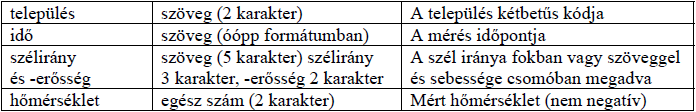

A sorok száma legfeljebb 500. Az adatok idő szerint rendezettek.
Például:
```
BP 0300 32007 21
PA 0315 35010 19
PR 0315 32009 19
SM 0315 01015 20
DC 0315 VRB01 21
SN 0315 00000 21
```
A példában látható, hogy 03:15-kor PR településen 320 fokos irányból 9 csomós szél fújt.
A hőmérséklet 19 °C volt. Ugyanekkor DC településen változó (VRB) szélirány volt 1 csomós
szélsebességgel, a hőmérséklet 21 °C volt.

Készítsen programot, amely a *tavirathu13.txt* állomány adatait felhasználva az alábbi
kérdésekre válaszol! A program forráskódját mentse metjelentes néven! (A program
megírásakor a felhasználó által megadott adatok helyességét, érvényességét nem kell
ellenőriznie, feltételezheti, hogy a rendelkezésre álló adatok a leírtaknak megfelelnek.)

A képernyőre írást igénylő részfeladatok eredményének megjelenítése előtt írja a képernyőre
a feladat sorszámát (például: 3. feladat)! Ha a felhasználótól kér be adatot, jelenítse meg
a képernyőn, hogy milyen értéket vár! Az ékezetmentes kiírás is elfogadott.

Az eredmény megjelenítését és a felhasználóval való kommunikációt a feladatot követő
minta alapján valósítsa meg!

##**Példa a szöveges kimenetek kialakításához:**
```
2. feladat
Adja meg egy település kódját! Település: SM
Az utolsó mérési adat a megadott településről 23:45-kor érkezett.
3. feladat
A legalacsonyabb hőmérséklet: SM 23:45 16 fok.
A legmagasabb hőmérséklet: DC 13:15 35 fok.
4. feladat
BP 01:00
DC 02:15
SN 03:15
BC 04:45
DC 04:45
SN 05:15
SN 05:45
KE 08:45
BC 11:45
5. feladat
BP Középhőmérséklet: 23; Hőmérséklet-ingadozás: 8
DC Középhőmérséklet: 29; Hőmérséklet-ingadozás: 15
SM Középhőmérséklet: 22; Hőmérséklet-ingadozás: 8
PA Középhőmérséklet: 21; Hőmérséklet-ingadozás: 7
SN Középhőmérséklet: 26; Hőmérséklet-ingadozás: 13
PR Középhőmérséklet: 21; Hőmérséklet-ingadozás: 8
BC NA; Hőmérséklet-ingadozás: 14
PP NA; Hőmérséklet-ingadozás: 6
KE NA; Hőmérséklet-ingadozás: 13
6. feladat
A fájlok elkészültek.
```

##**1. feladat:** 
Olvassa be és tárolja el a *tavirathu13.txt* állomány adatait!

In [4]:
f = open("tavirathu13.txt", "r")  # Nyissuk meg a fájlt olvasásra
adat = f.read()                   # olvassuk be változóba a fájl tartalmát
f.close()                         # zárjuk be a fájlt

# Bontsuk fel a nyers adatot soronként (sortörésenként)
adat_lista = adat.split("\n")
#print(adat_lista[-3:])           # Ellenőrzésképp nézzük meg a lista utolsó három elemét, majd kommenteljük ki
adat_lista.pop()                  # Mivel az utolsó elem egy üres string, ezért ezt dobjuk el

# Bontsuk ki a sorokat is
tablazat = []                       # Ebbe a listába gyűjtjük a sorok listáját

for i in range(len(adat_lista)):    # Menjünk végig az adat_lista elemein
  sor = adat_lista[i].split(" ")    # Az adott elemet bontsuk fel szóközök mentén és legyen ez a sor változó
  tablazat.append(sor)              # A sor változót rendeljük hozzá a táblázathoz

#print(tablazat[-2:])               # Ellenőrzésképpen nézzük meg a táblázat utolsó két elemét

##**2. feladat:** 
Kérje be a felhasználótól egy város kódját! Adja meg, hogy az adott városból mikor érkezett
az utolsó mérési adat! A kiírásban az időpontot óó:pp formátumban jelenítse meg!

```
2. feladat
Adja meg egy település kódját! Település: SM
Az utolsó mérési adat a megadott településről 23:45-kor érkezett.
```

In [ ]:
# Írjuk ki a feladat sorszámát
print("2. feladat")

# Kérjük be a város kódját:
varos = input("Adja meg egy település kódját! Település: ")

# Keressük meg a táblázatban a város adatait tartalmazó sorokat, majd a legnagyobb időértéket mentsük el
ido = "0000"                        # Adjuk meg a kiindulási értéknek 00:00-t stringként (a fájlban is ilyen formátumban szerepel)

for i in range(len(tablazat)):      # Haladjunk végig a táblázat sorain
  if varos == tablazat[i][0]:       # ha az adott sorban szereplő város kódja megegyezik a bekérttel, akkor
    if tablazat[i][1] > ido:        # ha az adott sorban szereplő idő nagyobb, mint az ido változóban tárolt, akkor
      ido = tablazat[i][1]          # az aktuális időt rendeljük az ido valtozohoz

# A feladat más formátumban kéri az időt, mint ahogy az tárolva van, így célszerű felbontani órára és percre:
ora = ido[:2]    
perc = ido[2:]

# Írjuk ki a megoldást a példának megfelelően:
print(f"Az utolsó mérési adat a megadott településről {ora}:{perc}-kor érkezett")

##**3. feladat:** 
Határozza meg, hogy a nap során mikor mérték a legalacsonyabb és a legmagasabb
hőmérsékletet! Jelenítse meg a méréshez kapcsolódó település nevét, az időpontot és
a hőmérsékletet! Amennyiben több legnagyobb vagy legkisebb érték van, akkor elég
az egyiket kiírnia.

```
3. feladat
A legalacsonyabb hőmérséklet: SM 23:45 16 fok.
A legmagasabb hőmérséklet: DC 13:15 35 fok.
```

In [ ]:
#Írjuk ki a feladat sorszámát
print("3. feladat")

# Gyűjtsük ki egy listába a hőmérsékleteket
hom = []                        # Ez lesz a hőmérsékleteket tartalmazó lista

for i in range(len(tablazat)):  # Menjünk végig a táblázat sorain
  akt_hom = tablazat[i][3]      # mentsük ki egy változóba az aktuális sorban található hőmérséklelet, majd
  hom.append(akt_hom)           # rendeljük hozzá a listához

# Keresük meg a minimum hőmérsékletet, illetve a hozzájuk tartozó indexet, majd ennek segítségével a várost és az időt
min_hom = min(hom)             # Keressük meg a hőmérséklet lista legkisebb elemét, majd
min_idx = hom.index(min_hom)   # a hozzá tartozó indexet
varos = tablazat[min_idx][0]   # az indexhez tartozó sorból olvassuk ki a várost és az 
ido = tablazat[min_idx][1]     # időt

# A feladat más formátumban kéri az időt, mint ahogy az tárolva van, így célszerű felbontani órára és percre:
ora = ido[:2]     
perc = ido[2:]

# Írjuk ki a mimumomhoz tartozó szöveget
print(f"A legalacsonyabb hőmérséklet: {varos} {ora}:{perc} {min_hom} fok.")

# Keresük meg a maximum hőmérsékletet, illetve a hozzájuk tartozó indexet, majd ennek segítségével a várost és az időt
max_hom = max(hom)             # Keressük meg a hőmérséklet lista legnagyobb elemét, majd
max_idx = hom.index(max_hom)   # a hozzá tartozó indexet
varos = tablazat[max_idx][0]   # az indexhez tartozó sorból olvassuk ki a várost és az 
ido = tablazat[max_idx][1]     # időt

# A feladat más formátumban kéri az időt, mint ahogy az tárolva van, így célszerű felbontani órára és percre:
ora = ido[:2]     
perc = ido[2:]

# Írjuk ki a maximumomhoz tartozó szöveget
print(f"A legalacsonyabb hőmérséklet: {varos} {ora}:{perc} {max_hom} fok.")

##**4. feladat:** 
Határozza meg, azokat a településeket és időpontokat, ahol és amikor a mérések idején
szélcsend volt! (A szélcsendet a táviratban 00000 kóddal jelölik.) Ha nem volt ilyen, akkor
a „`Nem volt szélcsend a mérések idején.`” szöveget írja ki! A kiírásnál a település kódját és
az időpontot jelenítse meg.

```
4. feladat
BP 01:00
DC 02:15
SN 03:15
BC 04:45
DC 04:45
SN 05:15
SN 05:45
KE 08:45
BC 11:45
```

In [ ]:
# Írjuk ki a feladat sorszámát
print("4. feladat")

# Keressük ki a táblázat azon sorait, mikor szélcsend volt, majd írjuk ki a hozzájuk tartozó információkat
for i in range(len(tablazat)):
  if tablazat[i][2] == "00000":
    varos = tablazat[i][0]
    ido = tablazat[i][1]
    ora = ido[:2]
    perc = ido[2:]

    print(f"{varos} {ora}:{perc}")

##**5. feladat:** 
Határozza meg a települések napi középhőmérsékleti adatát és a hőmérséklet-ingadozását!
A kiírásnál a település kódja szerepeljen a sor elején a minta szerint! A kiírásnál csak
a megoldott feladatrészre vonatkozó szöveget és értékeket írja ki!
1. A középhőmérséklet azon hőmérsékleti adatok átlaga, amikor a méréshez tartozó óra
értéke 1., 7., 13., 19. Ha egy településen a felsorolt órák valamelyikén nem volt mérés,
akkor a kiírásnál az „NA” szót jelenítse meg! Az adott órákhoz tartozó összes adat
átlagaként határozza meg a középhőmérsékletet, azaz minden értéket azonos súllyal
vegyen figyelembe! A középhőmérsékletet egészre kerekítve jelenítse meg!
2. A hőmérséklet-ingadozás számításhoz az adott településen a napi legmagasabb és
legalacsonyabb hőmérséklet különbségét kell kiszámítania! (Feltételezheti, hogy
minden település esetén volt legalább két mérési adat.)

```
5. feladat
BP Középhőmérséklet: 23; Hőmérséklet-ingadozás: 8
DC Középhőmérséklet: 29; Hőmérséklet-ingadozás: 15
SM Középhőmérséklet: 22; Hőmérséklet-ingadozás: 8
PA Középhőmérséklet: 21; Hőmérséklet-ingadozás: 7
SN Középhőmérséklet: 26; Hőmérséklet-ingadozás: 13
PR Középhőmérséklet: 21; Hőmérséklet-ingadozás: 8
BC NA; Hőmérséklet-ingadozás: 14
PP NA; Hőmérséklet-ingadozás: 6
KE NA; Hőmérséklet-ingadozás: 13
```


In [ ]:
#Írjuk ki a feladat sorszámát
print("5. feladat")

# Először hozzuk létre a városok listáját
varosok = []                    # hozzuk a városok listáját

for i in range(len(tablazat)):  # menjünk végig a táblázat sorain
  varos = tablazat[i][0]        # mentsük ki az adott sorban szereplő várost

  if varos not in varosok:      # ha az aktuális város még nincs a listában, akkor
    varosok.append(varos)       # rendeljük hozzá

# Menjünk végig a városokon
kozep_ido = ['01', '07', '13', '19']         # Hozzuk létre a középhőmérsékletek óráit tartalmazó listát

for varos in varosok:                        # Haladjunk végig a városokon
  kozep_homersekletek = []                   # Hozzuk létre a középhőmérsékletekhez szükséges hőmérsékletek listáját
  homersekletek = []                         # Hozzuk létre a hőmérsékletek listáját
  orak = []                                  # Hozzuk létre az órák listáját

  for i in range(len(tablazat)):             # Menjünk végig a táblázat sorain (minden város esetében)
    if tablazat[i][0] == varos:              # Ha az adott sorbna szereplő város megegyezik a keresettel, akkor
      hom = tablazat[i][3]                   # mentsük ki az aktuális hőmérsékletet, majd
      homersekletek.append(hom)              # rendeljük hozzá a hőmérsékletek listájához

      ido = tablazat[i][1]                   # mentsük ki az aktuális időt is, majd ebből 
      ora = ido[:2]                          # vegyük az órákat
      if ora in kozep_ido:                   # Ha az aktuális óra megegyezik a középhőmérséklet idők bármelyik elemével, akkor
        khom = int(tablazat[i][3])           # mentsük ki az aktuális hőmérsékletet, és konvertáljuk egész számmá, majd
        kozep_homersekletek.append(khom)     # rendeljük hozzá a listához
        orak.append(ora)                     # az aktuális órát is rendeljük a megfelelő listához

  kozep_hom = sum(kozep_homersekletek) // len(kozep_homersekletek)  # számítsuk ki a középhőmérséklethez szükséges hőmérsékletek átlagát,
  min_hom = int(min(homersekletek))                                 # az összes hőmérséklet minimumát (egész számként), valamint
  max_hom = int(max(homersekletek))                                 # a maximumát (szintén egész számként)
  dif_hom = max_hom - min_hom                                       # a maximum és a minimum különbsége adja a hőmérsékletingadozást

  # Azért, hogy meggyőződjünk, hogy minden órában van mérés, vegyük az egyedi órákat (alakítsuk set-té), és ha ez
  if len(set(orak)) < 4:                                                                # kisebb, mint 4 (azaz nincs minden órából adat), akkor
    print(f"{varos} NA; Hőmérséklet-ingadozás: {dif_hom}")                              # írjuk ki a példának megfelelően az információt
  else:                                                                                 # különben
    print(f"{varos} Középhőmérséklet: {kozep_hom}; Hőmérséklet-ingadozás: {dif_hom}")   # bővítsük a középhőmérsékletekkel, a példának megfelelően


##**6. feladat:** 
Hozzon létre településenként egy szöveges állományt, amely első sorában a település kódját
tartalmazza! A további sorokban a mérési időpontok és a hozzá tartozó szélerősségek
jelenjenek meg! A szélerősséget a minta szerint a számértéknek megfelelő számú
kettőskereszttel (#) adja meg! A fájlban az időpontokat és a szélerősséget megjelenítő
kettőskereszteket szóközzel válassza el egymástól! A fájl neve *X.txt* legyen, ahol
az X helyére a település kódja kerüljön!

```
6. feladat
A fájlok elkészültek.
```

**A** BS.txt **fájl tartalma:**
```
BC
00:45 ###
01:45 ####
02:45 ######
03:45 ##
04:45
05:45 ####
11:45
17:45 ########
```

In [ ]:
# Írjuk ki a feladat sorszámát
print("6. feladat")

# Használjuk fel az előző feladatban létrehozott városok listáját

for varos in varosok:                             # Menjünk végig a városokon
  f = open(f"{varos}.txt", "w")                   # hozzuk létre a "város".txt fájlt
  f.write(varos)                                  # írjuk bele a város nevét
  f.write("\n")                                   # a sor végére tegyünk sortörést

  for i in range(len(tablazat)):                  # minden város esetében menjünk végig a táblázat sorain
    if tablazat[i][0] == varos:                   # ha a sorban szereplő város megegyezik az aktuálissal, akkor
      ido = tablazat[i][1]                        # mentsük ki az időt és
      szel = tablazat[i][2]                       # a szélre vonatkozó adatot

      ora = ido[:2]                               # az időt bontsuk órára és
      perc = ido[2:]                              # percre
      szelerosseg = int(szel[3:]) * "#"           # majd a szélerősséget tartalmazó utolsó két karaktert alakítsuk egész számmá, majd szorozzuk meg '#'-tel

      f.write(f"{ora}:{perc} {szelerosseg}")      # Írjunk a fájlba a példának megfelelően
      f.write("\n")                               # majd minden sor végére tegyünk sortörést

  f.close()                                       # ha végigértünk a táblázat sorain, zárjuk be a fájlt
  
print("A fájlok elkészültek.")                    # Ha minden városhoz tartozó fájl elkészült, írjuk ki